# F Linear regression BOSTON
_5 points_

Train a linear regression model on the BOSTON dataset to predict median values of houses. Test it on the
test set. Show the code how you did it! What dependent variables (columns) have the biggest influence?

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import f_regression
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [5]:
boston_table = pd.DataFrame(boston.data)
boston_table.columns = boston.feature_names
boston_table['MEDV'] = boston.target
boston_table

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


[ 5.701 18.35 ]
[  1.15172   0.        8.14      0.        0.538     5.701    95.
   3.7872    4.      307.       21.      358.77     18.35   ]




[ 71.67089811  70.3443724  117.52227038  10.99838066  89.61208114
 308.36002731  67.3151842   27.50398153  67.23012884 101.44688866
 141.48772572  45.46361007 495.92670895]




Coefficients 0: [-0.41546547]
Intercept: 24.12202188000848
MSE: 66.92380714139914
--------------------------------
Coefficients 1: [0.15257264]
Intercept: 20.83063900202403
MSE: 75.10830109944825
--------------------------------
Coefficients 2: [-0.65510467]
Intercept: 29.75147336558483
MSE: 57.562761842960576
--------------------------------
Coefficients 3: [5.95524316]
Intercept: 22.234042553191486
MSE: 74.85865756754261
--------------------------------
Coefficients 4: [-34.53515511]
Intercept: 41.695544551223165
MSE: 64.12228379419476
--------------------------------
Coefficients 5: [8.82345634]
Intercept: -32.839129906011266
MSE: 23.970455527991305


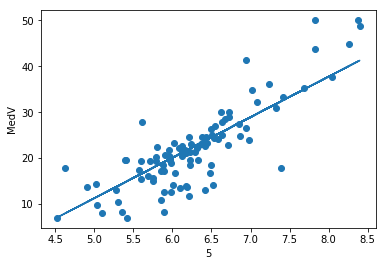

--------------------------------
Coefficients 6: [-0.12402883]
Intercept: 31.046174127745555
MSE: 67.8462187008521
--------------------------------
Coefficients 7: [1.14203634]
Intercept: 18.268995325441114
MSE: 74.25783765836505
--------------------------------
Coefficients 8: [-0.40378907]
Intercept: 26.494772091458852
MSE: 66.36195010598259
--------------------------------
Coefficients 9: [-0.0247456]
Intercept: 32.67181214858772
MSE: 55.27592896210288
--------------------------------
Coefficients 10: [-2.15901079]
Intercept: 62.426556023258456
MSE: 59.15265212517367
--------------------------------
Coefficients 11: [0.03321748]
Intercept: 10.728455938270416
MSE: 66.56597738624318
--------------------------------
Coefficients 12: [-0.97981166]
Intercept: 34.87291567862843
MSE: 38.82182901428658


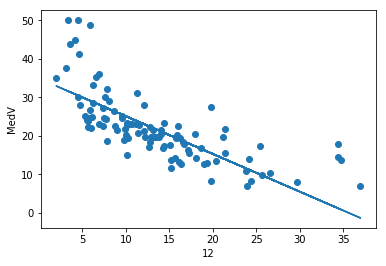

--------------------------------


In [20]:
from sklearn.model_selection import train_test_split

X = boston.data
Y = boston.target

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)


from sklearn.feature_selection import SelectKBest
kbest = SelectKBest(f_regression, k=2)
arr = kbest.fit_transform(X_train, Y_train)
print(arr[0])
print(X_train[0])


from sklearn.linear_model import LinearRegression

print("\n\n\n")
print(kbest.scores_)
arr = [5, 12]
print("\n\n\n")
for i in range(13):        
    reg = LinearRegression()
    reg.fit(X_train[:, i].reshape(-1, 1), Y_train)
    pred = reg.predict(X_test[:, i].reshape(-1, 1))
    print('Coefficients {}: {}'.format(i, reg.coef_))
    print("Intercept: {}".format(reg.intercept_))
    print("MSE: {}".format(sklearn.metrics.mean_squared_error(Y_test, pred)))
    if i in arr:
        plt.scatter(X_test[:, i], Y_test)
        plt.xlabel(i)
        plt.ylabel("MedV")
        plt.plot(X_test[:, i], pred)
        plt.show()
    print("--------------------------------")

## Answer

In order to train and test the Boston Data Set, you first have to split the data into two. We decided to go for a ration of 1:5 (test:train) because the size of the test set was not given.

The second part of the exercise was the question which dependent variables have the biggest influence. Therefore, we used "SelectKBest". To prove that our results are right, we then calculated the mean squared error for every dependent variable and scattered/plotted the graphes for the two most influential variables RM (5) and LSTAT (12).
As you can see, the real values and the predicted line fit quite nicely.